            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3
1901-06-01  168.5
1901-07-01  231.8
1901-08-01  224.5
1901-09-01  192.8
1901-10-01  122.9
1901-11-01  336.5
1901-12-01  185.9
1902-01-01  194.3
1902-02-01  149.5
1902-03-01  210.1
1902-04-01  273.3
1902-05-01  191.4
1902-06-01  287.0
1902-07-01  226.0
1902-08-01  303.6
1902-09-01  289.9
1902-10-01  421.6
1902-11-01  264.5
1902-12-01  342.3
1903-01-01  339.7
1903-02-01  440.4
1903-03-01  315.9
1903-04-01  439.3
1903-05-01  401.3
1903-06-01  437.4
1903-07-01  575.5
1903-08-01  407.6
1903-09-01  682.0
1903-10-01  475.3
1903-11-01  581.3
1903-12-01  646.9
                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613
1901-01-04  254.377419
1901-01-05  250.503226
1901-01-06  246.629032
1901-01-07  242.754839
1901-01-08  238.880645
1901-01-09  235.006452
1901-01-10  231.132258
1901-01-11  227.258065
1901-01-12  223.3

C:\Users\admin\AppData\Local\Temp\ipykernel_7572\3966586991.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(url, header=0, parse_dates=[0], index_col=0, date_parser=parser)


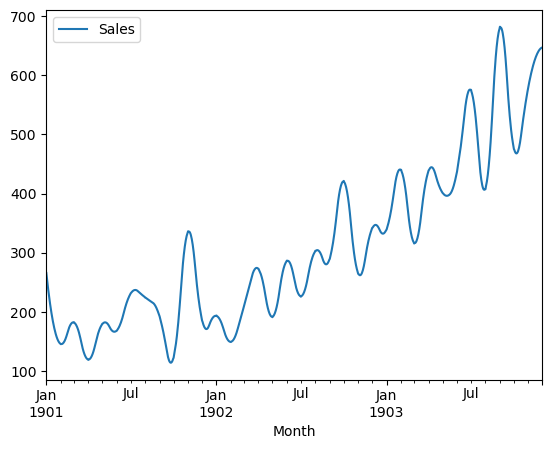

                 Sales
Month                 
1901-03-31  198.333333
1901-06-30  156.033333
1901-09-30  216.366667
1901-12-31  215.100000
1902-03-31  184.633333


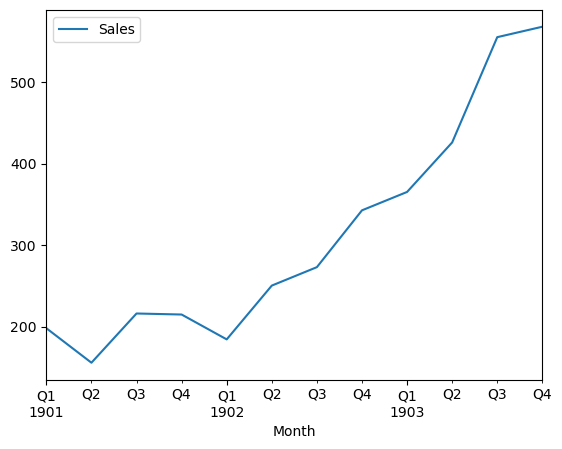

             Sales
Month             
1901-12-31  2357.5
1902-12-31  3153.5
1903-12-31  5742.6


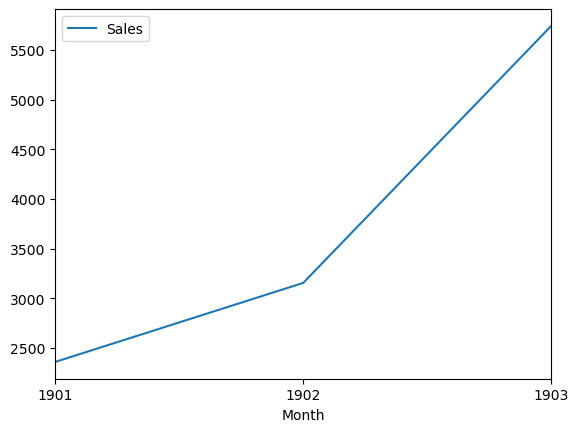

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot
import datetime

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')  # Correct format string
series = read_csv(url, header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series)
upsampled = series.resample('D')  # Changed series1 to series
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated = upsampled.interpolate(method='spline', order=2)  # Changed splline to spline
print(interpolated.head(32))
interpolated.plot()
pyplot.show()
resample = series.resample('Q')  
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()
resample = series.resample('A')
annual_total_sales = resample.sum()  
print(annual_total_sales)
annual_total_sales.plot()  
pyplot.show()

In [10]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 7.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 1.3 MB/s eta 0:00:01
   ----------------

In [14]:
import pandas as pd
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
train_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
test_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
oil_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
transactions_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
holidays_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
stores_data = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')

# Combine train and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Feature engineering (date, oil, transactions, stores, holidays)
# ... (Refer to the original code for detailed feature engineering functions)

# Data preprocessing
combined_data['date'] = pd.to_datetime(combined_data['date'])
# ... (Apply feature engineering functions like add_payday_flow, preprocess_oil_data, etc.)

# Scaling
numerical_features = ['onpromotion', 'oil_price'] 
scaler = MinMaxScaler()
combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])

# Split data
train = combined_data[~combined_data['sales'].isna()]
test = combined_data[combined_data['sales'].isna()]

# Encode categorical features
categorical_features = ['is_holiday_in_store_location', 'store_city', 'store_state', 
                        'store_type', 'cluster', 'payday_flow', 'family']
for col in categorical_features:
    combined_data[col] = pd.Categorical(combined_data[col]).codes
    
# Logarithmic transformation of target variable
train['sales_log'] = np.log1p(train['sales'])

# Split into training and validation sets
X = train.drop(columns=['sales', 'sales_log'])
y = train['sales_log']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training (CatBoost)
catboost_model = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.1, 
    depth=8, 
    eval_metric='RMSE', 
    verbose=False, 
    random_seed=42,
    l2_leaf_reg=5,
    bagging_temperature=0.7
)
catboost_model.fit(X_train, y_train)

# Model training (LightGBM)
lightgbm_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    random_state=42,
    subsample=0.8,
    reg_lambda=0.1,
    reg_alpha=0,
    num_leaves=100,
    min_child_samples=20,
    colsample_bytree=0.6,
    verbose=-1
)
lightgbm_model.fit(X_train, y_train)

# Make predictions
catboost_predictions_log = catboost_model.predict(test[X_train.columns])
lightgbm_predictions_log = lightgbm_model.predict(test[X_train.columns])

# Convert predictions back to original scale
catboost_predictions = np.expm1(catboost_predictions_log)
lightgbm_predictions = np.expm1(lightgbm_predictions_log)

# Combine predictions
final_predictions = (catboost_predictions + lightgbm_predictions) / 2

# Create submission file
submission = test[['id']].copy()
submission['sales'] = final_predictions
submission.to_csv('submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/store-sales-time-series-forecasting/train.csv'

In [15]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load data using correct file paths
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
holidays = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')

# Combine train and test data
combined_data = pd.concat([train, test], ignore_index=True)

# Feature engineering and preprocessing
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data['year'] = combined_data['date'].dt.year
combined_data['month'] = combined_data['date'].dt.month
combined_data['day'] = combined_data['date'].dt.day
combined_data['day_of_week'] = combined_data['date'].dt.dayofweek
combined_data['is_weekend'] = combined_data['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
combined_data['is_payday'] = combined_data['date'].dt.day.apply(lambda x: 1 if x in [15, 30] else 0)

# Function for payday variable
def add_payday_flow(data):
    data['payday_flow'] = data['date'].dt.day.apply(
        lambda x: '30_before' if x >= 24 or x <= 1 else
                  '30_after' if 2 <= x <= 8 else
                  '15_before' if 9 <= x <= 14 else
                  '15_after' if 16 <= x <= 23 else 'other'
    )
    return data

combined_data = add_payday_flow(combined_data)

# Oil data preprocessing
oil['date'] = pd.to_datetime(oil['date'])
oil = oil.rename(columns={'dcoilwtico': 'oil_price'})
combined_data = combined_data.merge(oil, on='date', how='left')
combined_data['oil_price'].fillna(method='ffill', inplace=True)

# Transactions data preprocessing
transactions['date'] = pd.to_datetime(transactions['date'])
combined_data = combined_data.merge(transactions, on=['date', 'store_nbr'], how='left')
combined_data['transactions'].fillna(0, inplace=True)

# Stores data preprocessing
stores = stores.rename(columns={'city': 'store_city', 'state': 'store_state', 'type': 'store_type'})
combined_data = combined_data.merge(stores, on='store_nbr', how='left')

# Holidays data preprocessing
def preprocess_holiday_data(holidays_data, combined_data):
    holidays_data['date'] = pd.to_datetime(holidays_data['date'])
    holiday_data_filtered = holidays_data[
        (holidays_data['transferred'] != True) &  
        (holidays_data['type'] != "Work Day")    
    ].copy()

    holiday_data_filtered['is_holiday'] = np.where(
        holiday_data_filtered['type'] == "Holiday", "Yes", "No"
    )

    holiday_data_filtered['holiday_location'] = np.where(
        holiday_data_filtered['type'] == "Holiday",
        holiday_data_filtered['locale'],
        "Non-Holiday"
    )

    holiday_data_filtered['holiday_location_name'] = np.where(
        holiday_data_filtered['type'] == "Holiday",
        holiday_data_filtered['locale_name'],
        "Non-Holiday"
    )

    combined_data = combined_data.merge(
        holiday_data_filtered[['date', 'is_holiday', 'holiday_location', 'holiday_location_name']],
        on='date',
        how='left'
    )

    combined_data['is_holiday'] = combined_data['is_holiday'].fillna("No")
    combined_data['holiday_location'] = combined_data['holiday_location'].fillna("Non-Holiday")
    combined_data['holiday_location_name'] = combined_data['holiday_location_name'].fillna("Non-Holiday")

    # Create a holiday indicator for the store's location.
    def is_holiday_in_store_location(row):
        if row['is_holiday'] == "Yes" and row['holiday_location'] == "National":
            return "Yes"
        elif row['is_holiday'] == "Yes" and row['holiday_location'] == "Local" and row['store_city'] == row['holiday_location_name']:
            return "Yes"
        elif row['is_holiday'] == "Yes" and row['holiday_location'] == "Regional" and row['store_state'] == row['holiday_location_name']:
            return "Yes"
        else:
            return "No"

    combined_data['is_holiday_in_store_location'] = combined_data.apply(is_holiday_in_store_location, axis=1)

    combined_data['is_holiday_in_store_location'] = combined_data['is_holiday_in_store_location'].astype('category')

    # Remove unnecessary columns.
    columns_to_drop = ['date', 'holiday_location', 'holiday_location_name', 'type', 'description', 'transferred', 'locale', 'locale_name', 'is_holiday']
    combined_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    return combined_data

combined_data = preprocess_holiday_data(holidays, combined_data)

# Scaling
numerical_features = ['onpromotion', 'oil_price', 'transactions']
scaler = MinMaxScaler()
combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])

# Encode categorical features
categorical_features = ['is_holiday_in_store_location', 'store_city', 'store_state',
                        'store_type', 'cluster', 'payday_flow', 'family']
for col in categorical_features:
    combined_data[col] = pd.Categorical(combined_data[col]).codes

# Split data
train = combined_data[~combined_data['sales'].isna()]
test = combined_data[combined_data['sales'].isna()]

# Logarithmic transformation of target variable
train['sales_log'] = np.log1p(train['sales'])

# Split into training and validation sets
X = train.drop(columns=['sales', 'sales_log', 'date'])  # Exclude 'date'
y = train['sales_log']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training (CatBoost)
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    eval_metric='RMSE',
    verbose=False,
    random_seed=42,
    l2_leaf_reg=5,
    bagging_temperature=0.7
)
catboost_model.fit(X_train, y_train)

# Model training (LightGBM)
lightgbm_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    random_state=42,
    subsample=0.8,
    reg_lambda=0.1,
    reg_alpha=0,
    num_leaves=100,
    min_child_samples=20,
    colsample_bytree=0.6,
    verbose=-1
)
lightgbm_model.fit(X_train, y_train)

# Make predictions
catboost_predictions_log = catboost_model.predict(test[X_train.columns])
lightgbm_predictions_log = lightgbm_model.predict(test[X_train.columns])

# Convert predictions back to original scale
catboost_predictions = np.expm1(catboost_predictions_log)
lightgbm_predictions = np.expm1(lightgbm_predictions_log)

# Combine predictions
final_predictions = (catboost_predictions + lightgbm_predictions) / 2

# Create submission file
submission = test[['id']].copy()
submission['sales'] = final_predictions
submission.to_csv('submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/store-sales-time-series-forecasting/train.csv'